In [59]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)
file_location = 'data/Automobile.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Reading the formatted data
data = pd.read_csv(file_location, sep='#', decimal='.', header=None, names=[
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
    'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
    'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
    'highway-mpg', 'price'
])
# Displaying the first 10 values
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [60]:
# Lower all string values
data = data.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [61]:
# Trim all redundant whitespaces
data = data.apply(lambda x: x.str.strip() if(x.dtype == 'object') else x)

In [62]:
# List all of data types of the data frame
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [63]:
def check_if_column_has_nan_value(df, column):
    if df[column].isna().any():
        return False
    else:
        return True

In [64]:
def check_lower_bound(df, column, lower_bound):
    if df[column].min() < lower_bound:
        return False
    else:
        return True

In [65]:
def list_unique_values_in_a_column(df, column):
    return df[column].unique().tolist()

In [66]:
def fix_typo(df, column, typo, correct_word):
    mask = df[column] == typo
    df.loc[mask, column] = correct_word

In [67]:
def replace_oob_values(df, column, oob_value, value, sign):
    if sign == '>':
        mask = df[column] > oob_value
        df.loc[mask, column] = value
    elif sign == '<':
        mask = df[column] < oob_value
        df.loc[mask, column] = value

In [68]:
def list_nan_values_in_column(df, column):
    return df.loc[data[column].isna()]

In [69]:
# List all unique values in the symboling column to find out-of-bound values
list_unique_values_in_a_column(data, 'symboling')

[3, 1, 2, 0, -1, -2, 4]

In [70]:
# Replace greater bound value with maximum value
replace_oob_values(data, 'symboling', 3, 3, '>')
# Replace lesser bound value with minimum value
replace_oob_values(data, 'symboling', -3, -3, '<')
list_unique_values_in_a_column(data, 'symboling')

[3, 1, 2, 0, -1, -2]

In [71]:
# List all unique values in the make column to find typos
list_unique_values_in_a_column(data, 'make')
# typo = vol00112ov

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 'vol00112ov']

In [72]:
# Replace typo in make column
fix_typo(data, 'make', 'vol00112ov', 'volvo')
list_unique_values_in_a_column(data, 'make')

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [73]:
# List all unique values in the symboling column to find out-of-bound values
list_unique_values_in_a_column(data, 'normalized-losses')

[nan,
 164.0,
 158.0,
 192.0,
 188.0,
 121.0,
 98.0,
 81.0,
 118.0,
 148.0,
 110.0,
 145.0,
 137.0,
 101.0,
 78.0,
 106.0,
 85.0,
 107.0,
 104.0,
 113.0,
 150.0,
 129.0,
 115.0,
 93.0,
 142.0,
 161.0,
 153.0,
 125.0,
 128.0,
 122.0,
 103.0,
 168.0,
 108.0,
 194.0,
 231.0,
 119.0,
 154.0,
 74.0,
 186.0,
 83.0,
 102.0,
 89.0,
 87.0,
 77.0,
 91.0,
 134.0,
 65.0,
 197.0,
 90.0,
 94.0,
 256.0,
 95.0,
 25.0]

In [74]:
# Replace NaN values with mean of normalized-losses group by make. if mean of group = 0, take the whole column avarage
data['normalized-losses'] = data['normalized-losses'].fillna(data.groupby('make')['normalized-losses'].transform('mean'))
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())
list_nan_values_in_column(data, 'normalized-losses')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [75]:
# List all unique values in the fuel type column to find typos
list_unique_values_in_a_column(data, 'fuel-type')
# No typo here

['gas', 'diesel']

In [76]:
# List all unique values in the aspiration column to find typos
list_unique_values_in_a_column(data, 'aspiration')
# typo found: turrrrbo

['std', 'turbo', 'turrrrbo']

In [77]:
# Replace typo
fix_typo(data, 'aspiration', 'turrrrbo', 'turbo')
list_unique_values_in_a_column(data, 'aspiration')

['std', 'turbo']

In [78]:
# List all unique values in the aspiration column to find typos and NaN
list_unique_values_in_a_column(data, 'num-of-doors')
# typo found: fourr
# NaN found

['two', 'four', nan, 'fourr']

In [79]:
# Replace typo
fix_typo(data, 'num-of-doors', 'fourr', 'four')
list_unique_values_in_a_column(data, 'num-of-doors')

['two', 'four', nan]

In [80]:
#View all NaN value in this column
list_nan_values_in_column(data, 'num-of-doors')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.000000,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,123.933333,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [81]:
data['num-of-doors'] = data['num-of-doors'].fillna('four')
# if body-style == sedan or wagon, most likely a 4-door car
list_unique_values_in_a_column(data, 'num-of-doors')

['two', 'four']

In [82]:
list_unique_values_in_a_column(data, 'body-style')
# No NaN values, or typos

['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']

In [83]:
list_unique_values_in_a_column(data, 'drive-wheels')
# No NaN values, or typos

['rwd', 'fwd', '4wd']

In [84]:
list_unique_values_in_a_column(data, 'engine-location')
# No NaN values, or typos

['front', 'rear']

In [85]:
list_unique_values_in_a_column(data, 'wheel-base')
# No NaN or out-of-bound values

[88.6,
 94.5,
 99.8,
 99.4,
 105.8,
 99.5,
 101.2,
 103.5,
 110.0,
 88.4,
 93.7,
 103.3,
 95.9,
 86.6,
 96.5,
 94.3,
 96.0,
 113.0,
 102.0,
 93.1,
 95.3,
 98.8,
 104.9,
 106.7,
 115.6,
 96.6,
 120.9,
 112.0,
 102.7,
 93.0,
 96.3,
 95.1,
 97.2,
 100.4,
 91.3,
 99.2,
 107.9,
 114.2,
 108.0,
 89.5,
 98.4,
 96.1,
 99.1,
 93.3,
 97.0,
 96.9,
 95.7,
 102.4,
 102.9,
 104.5,
 97.3,
 104.3,
 109.1]

In [86]:
list_unique_values_in_a_column(data, 'length')
# No NaN or out-of-bound values

[168.8,
 171.2,
 176.6,
 177.3,
 192.7,
 178.2,
 176.8,
 189.0,
 193.8,
 197.0,
 141.1,
 155.9,
 158.8,
 157.3,
 174.6,
 173.2,
 144.6,
 150.0,
 163.4,
 157.1,
 167.5,
 175.4,
 169.1,
 170.7,
 172.6,
 199.6,
 191.7,
 159.1,
 166.8,
 169.0,
 177.8,
 175.0,
 190.9,
 187.5,
 202.6,
 180.3,
 208.1,
 199.2,
 178.4,
 173.0,
 172.4,
 165.3,
 170.2,
 165.6,
 162.4,
 173.4,
 181.7,
 184.6,
 178.5,
 186.7,
 198.9,
 167.3,
 168.9,
 175.7,
 181.5,
 186.6,
 156.9,
 157.9,
 172.0,
 173.5,
 173.6,
 158.7,
 169.7,
 166.3,
 168.7,
 176.2,
 175.6,
 183.5,
 187.8,
 171.7,
 159.3,
 165.7,
 180.2,
 183.1,
 188.8]

In [87]:
list_unique_values_in_a_column(data, 'width')
# No NaN or out-of-bound values

[64.1,
 65.5,
 66.2,
 66.4,
 66.3,
 71.4,
 67.9,
 64.8,
 66.9,
 70.9,
 60.3,
 63.6,
 63.8,
 64.6,
 63.9,
 64.0,
 65.2,
 62.5,
 66.0,
 61.8,
 69.6,
 70.6,
 64.2,
 65.7,
 66.5,
 66.1,
 70.3,
 71.7,
 70.5,
 72.0,
 68.0,
 64.4,
 65.4,
 68.4,
 68.3,
 65.0,
 72.3,
 66.6,
 63.4,
 65.6,
 67.7,
 67.2,
 68.9,
 68.8]

In [88]:
list_unique_values_in_a_column(data, 'height')
# No NaN or out-of-bound values

[48.8,
 52.4,
 54.3,
 53.1,
 55.7,
 55.9,
 52.0,
 53.7,
 56.3,
 53.2,
 50.8,
 50.6,
 59.8,
 50.2,
 52.6,
 54.5,
 58.3,
 53.3,
 54.1,
 51.0,
 53.5,
 51.4,
 52.8,
 47.8,
 49.6,
 55.5,
 54.4,
 56.5,
 58.7,
 54.9,
 56.7,
 55.4,
 54.8,
 49.4,
 51.6,
 54.7,
 55.1,
 56.1,
 49.7,
 56.0,
 50.5,
 55.2,
 52.5,
 53.0,
 59.1,
 53.9,
 55.6,
 56.2,
 57.5]

In [89]:
list_unique_values_in_a_column(data, 'curb-weight')
# No NaN or out-of-bound values

[2548,
 2823,
 2337,
 2824,
 2507,
 2844,
 2954,
 3086,
 3053,
 2395,
 2710,
 2765,
 3055,
 3230,
 3380,
 3505,
 1488,
 1874,
 1909,
 1876,
 2128,
 1967,
 1989,
 2191,
 2535,
 2811,
 1713,
 1819,
 1837,
 1940,
 1956,
 2010,
 2024,
 2236,
 2289,
 2304,
 2372,
 2465,
 2293,
 2734,
 4066,
 3950,
 1890,
 1900,
 1905,
 1945,
 1950,
 2380,
 2385,
 2500,
 2410,
 2443,
 2425,
 2670,
 2700,
 3515,
 3750,
 3495,
 3770,
 3740,
 3685,
 3900,
 3715,
 2910,
 1918,
 1944,
 2004,
 2145,
 2370,
 2328,
 2833,
 2921,
 2926,
 2365,
 2405,
 2403,
 1889,
 2017,
 1938,
 1951,
 2028,
 1971,
 2037,
 2008,
 2324,
 2302,
 3095,
 3296,
 3060,
 3071,
 3139,
 3020,
 3197,
 3430,
 3075,
 3252,
 3285,
 3485,
 3130,
 2818,
 2778,
 2756,
 2800,
 3366,
 2579,
 2460,
 2658,
 2695,
 2707,
 2758,
 2808,
 2847,
 2050,
 2120,
 2240,
 2190,
 2340,
 2510,
 2290,
 2455,
 2420,
 2650,
 1985,
 2040,
 2015,
 2280,
 3110,
 2081,
 2109,
 2275,
 2094,
 2122,
 2140,
 2169,
 2204,
 2265,
 2300,
 2540,
 2536,
 2551,
 2679,
 2714,
 2975,

In [90]:
list_unique_values_in_a_column(data, 'engine-type')
# No Typos found

['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']

In [91]:
# Replace all typos with ohc
#data.loc[data['engine-type'].str.contains('ohc'), 'engine-type'] = 'ohc'
#list_unique_values_in_a_column(data, 'engine-type')

In [92]:
list_unique_values_in_a_column(data, 'num-of-cylinders')
# No NaN or out-of-bound values

['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']

In [93]:
list_unique_values_in_a_column(data, 'engine-size')
# No NaN or out-of-bound values

[130,
 152,
 109,
 136,
 131,
 108,
 164,
 209,
 61,
 90,
 98,
 122,
 156,
 92,
 79,
 110,
 111,
 119,
 258,
 326,
 91,
 70,
 80,
 140,
 134,
 183,
 234,
 308,
 304,
 97,
 103,
 120,
 181,
 151,
 194,
 203,
 132,
 121,
 146,
 171,
 161,
 141,
 173,
 145]

In [94]:
list_unique_values_in_a_column(data, 'fuel-system')
# No NaN or out-of-bound values

['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']

In [95]:
list_unique_values_in_a_column(data, 'bore')
# NaN value found

[3.47,
 2.68,
 3.19,
 3.13,
 3.5,
 3.31,
 3.62,
 2.91,
 3.03,
 2.97,
 3.34,
 3.6,
 2.92,
 3.15,
 3.43,
 3.63,
 3.54,
 3.08,
 nan,
 3.39,
 3.76,
 3.58,
 3.46,
 3.8,
 3.78,
 3.17,
 3.35,
 3.59,
 2.99,
 3.33,
 3.7,
 3.61,
 3.94,
 3.74,
 2.54,
 3.05,
 3.27,
 3.24,
 3.01]

In [96]:
# Replacing NaN values with median value since the values in this column are relative close to each other.
data['bore'] = data['bore'].fillna(data['bore'].median())
list_unique_values_in_a_column(data, 'bore')

[3.47,
 2.68,
 3.19,
 3.13,
 3.5,
 3.31,
 3.62,
 2.91,
 3.03,
 2.97,
 3.34,
 3.6,
 2.92,
 3.15,
 3.43,
 3.63,
 3.54,
 3.08,
 3.35,
 3.39,
 3.76,
 3.58,
 3.46,
 3.8,
 3.78,
 3.17,
 3.59,
 2.99,
 3.33,
 3.7,
 3.61,
 3.94,
 3.74,
 2.54,
 3.05,
 3.27,
 3.24,
 3.01]

In [97]:
list_unique_values_in_a_column(data, 'stroke')
# NaN value found

[2.68,
 3.47,
 3.4,
 2.8,
 3.19,
 3.39,
 3.03,
 3.11,
 3.23,
 3.46,
 3.9,
 3.41,
 3.07,
 3.58,
 4.17,
 2.76,
 3.15,
 nan,
 3.16,
 3.64,
 3.1,
 3.35,
 3.12,
 3.86,
 3.29,
 3.27,
 3.52,
 2.19,
 3.21,
 2.9,
 2.07,
 2.36,
 2.64,
 3.08,
 3.5,
 3.54,
 2.87]

In [98]:
# Replacing NaN values with median value since the values in this column are relative close to each other.
data['stroke'] = data['stroke'].fillna(data['stroke'].median())
list_unique_values_in_a_column(data, 'stroke')

[2.68,
 3.47,
 3.4,
 2.8,
 3.19,
 3.39,
 3.03,
 3.11,
 3.23,
 3.46,
 3.9,
 3.41,
 3.07,
 3.58,
 4.17,
 2.76,
 3.15,
 3.27,
 3.16,
 3.64,
 3.1,
 3.35,
 3.12,
 3.86,
 3.29,
 3.52,
 2.19,
 3.21,
 2.9,
 2.07,
 2.36,
 2.64,
 3.08,
 3.5,
 3.54,
 2.87]

In [99]:
list_unique_values_in_a_column(data, 'compression-ratio')
# No NaN or out-of-bound values

[9.0,
 10.0,
 8.0,
 8.5,
 8.3,
 7.0,
 8.8,
 9.5,
 9.6,
 9.41,
 9.4,
 7.6,
 9.2,
 10.1,
 9.1,
 8.1,
 11.5,
 8.6,
 22.7,
 22.0,
 21.5,
 7.5,
 21.9,
 7.8,
 8.4,
 21.0,
 8.7,
 9.31,
 9.3,
 7.7,
 22.5,
 23.0]

In [100]:
list_unique_values_in_a_column(data, 'horsepower')
# NaN Value Found

[111.0,
 154.0,
 102.0,
 115.0,
 110.0,
 140.0,
 160.0,
 101.0,
 121.0,
 182.0,
 48.0,
 70.0,
 68.0,
 88.0,
 145.0,
 58.0,
 76.0,
 60.0,
 86.0,
 100.0,
 78.0,
 90.0,
 176.0,
 262.0,
 135.0,
 84.0,
 64.0,
 120.0,
 72.0,
 123.0,
 155.0,
 184.0,
 175.0,
 116.0,
 69.0,
 55.0,
 97.0,
 152.0,
 200.0,
 95.0,
 142.0,
 143.0,
 207.0,
 288.0,
 nan,
 73.0,
 82.0,
 94.0,
 62.0,
 56.0,
 112.0,
 92.0,
 161.0,
 156.0,
 52.0,
 85.0,
 114.0,
 162.0,
 134.0,
 106.0]

In [101]:
# Num of cylinders has a positive correlation with horsepower
# Replace NaN values with the average values calculate by grouping engine-type and num-of-cylinders
data['horsepower'] = data['horsepower'].fillna(data.groupby(['engine-type', 'num-of-cylinders'])['horsepower'].transform('mean'))
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())
list_nan_values_in_column(data, 'horsepower')
# NaN Value Found

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [102]:
# TODO Replace NaN
list_unique_values_in_a_column(data, 'peak-rpm')
# NaN Value Found

[5000.0,
 5500.0,
 5800.0,
 4250.0,
 5400.0,
 5100.0,
 4800.0,
 6000.0,
 4750.0,
 4650.0,
 4200.0,
 4350.0,
 4500.0,
 5200.0,
 4150.0,
 5600.0,
 5900.0,
 5750.0,
 nan,
 5250.0,
 4900.0,
 4400.0,
 6600.0,
 5300.0]

In [103]:
# Peak RPM depends on the fuel system
data['peak-rpm'] = data['peak-rpm'].fillna(data.groupby(['fuel-system'])['peak-rpm'].transform('mean'))
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())
list_nan_values_in_column(data, 'peak-rpm')


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [104]:
list_unique_values_in_a_column(data, 'city-mpg')
# No NaN or out-of-bound values

[21,
 19,
 24,
 18,
 17,
 16,
 23,
 20,
 15,
 47,
 38,
 37,
 31,
 49,
 30,
 27,
 25,
 13,
 26,
 36,
 22,
 14,
 45,
 28,
 32,
 35,
 34,
 29,
 33]

In [105]:
list_unique_values_in_a_column(data, 'highway-mpg')
# No NaN or out-of-bound values

[27,
 26,
 30,
 22,
 25,
 20,
 29,
 28,
 53,
 43,
 41,
 38,
 24,
 54,
 42,
 34,
 33,
 31,
 19,
 17,
 23,
 32,
 39,
 18,
 16,
 37,
 50,
 36,
 47,
 46]

In [106]:
list_unique_values_in_a_column(data, 'price')
# NaN and 0 value found

[13495.0,
 16500.0,
 13950.0,
 17450.0,
 15250.0,
 17710.0,
 18920.0,
 23875.0,
 nan,
 16430.0,
 16925.0,
 20970.0,
 21105.0,
 24565.0,
 30760.0,
 41315.0,
 36880.0,
 5151.0,
 6295.0,
 6575.0,
 5572.0,
 6377.0,
 7957.0,
 6229.0,
 6692.0,
 7609.0,
 8558.0,
 8921.0,
 12964.0,
 6479.0,
 6855.0,
 5399.0,
 6529.0,
 7129.0,
 7295.0,
 7895.0,
 9095.0,
 8845.0,
 10295.0,
 12945.0,
 10345.0,
 6785.0,
 11048.0,
 32250.0,
 35550.0,
 36000.0,
 5195.0,
 6095.0,
 6795.0,
 6695.0,
 7395.0,
 10945.0,
 11845.0,
 13645.0,
 15645.0,
 8495.0,
 10595.0,
 10245.0,
 10795.0,
 11245.0,
 18280.0,
 18344.0,
 25552.0,
 28248.0,
 28176.0,
 31600.0,
 34184.0,
 35056.0,
 40960.0,
 45400.0,
 16503.0,
 5389.0,
 6189.0,
 6669.0,
 7689.0,
 9959.0,
 8499.0,
 12629.0,
 14869.0,
 14489.0,
 6989.0,
 8189.0,
 9279.0,
 5499.0,
 7099.0,
 6649.0,
 6849.0,
 7349.0,
 7299.0,
 7799.0,
 7499.0,
 7999.0,
 8249.0,
 8949.0,
 9549.0,
 13499.0,
 14399.0,
 17199.0,
 19699.0,
 18399.0,
 11900.0,
 13200.0,
 12440.0,
 13860.0,
 15580.0,
 1

In [107]:
list_nan_values_in_column(data, 'price')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,161.000000,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,120.549165,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,120.549165,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,186.000000,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [108]:
# Replace NaN values with the make's average
data['price'] = data['price'].fillna(data.groupby('make')['price'].transform('mean'))
data['price'] = data['price'].fillna(data['price'].mean())
list_nan_values_in_column(data, 'price')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [109]:
# Replace 0.0 with with NaN
data['price'] = data['price'].replace(0.0, np.nan)
# Replace Nan Values with make's average price
data['price'] = data['price'].fillna(data.groupby('make')['price'].transform('mean'))
data['price'] = data['price'].fillna(data['price'].mean())
data.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
228,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.000000
229,-1,95.000000,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.000000
230,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.000000
231,3,25.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.000000
232,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.000000
233,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.000000
234,-1,87.342105,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.000000
235,-1,87.342105,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.000000
236,-1,95.000000,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,19709.078947
237,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,19709.078947


In [110]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values

#Code goes after this line
nominal_value = 'make'
ordinal_value = 'symboling'
numerical_value = 'price'

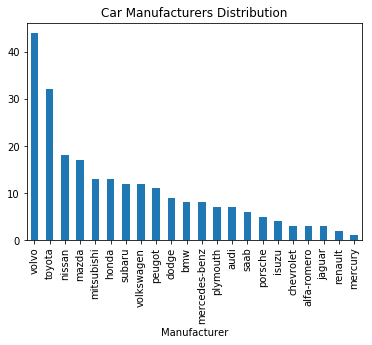

In [122]:
%matplotlib inline
# Graph for make
data['make'].value_counts().plot(kind='bar')
plt.title('Car Manufacturers Distribution')
plt.xlabel('Manufacturer')
plt.savefig('make.png', bbox_inches = 'tight')
plt.show()
plt.close()

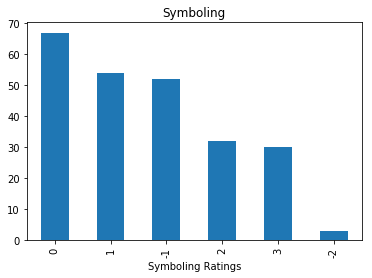

In [125]:
%matplotlib inline
# Graph for Symboling
data['symboling'].value_counts().plot(kind='bar')
plt.title('Symboling')
plt.xlabel('Symboling Ratings')
plt.savefig('symboling.png', bbox_inches = 'tight')
plt.show()
plt.close()

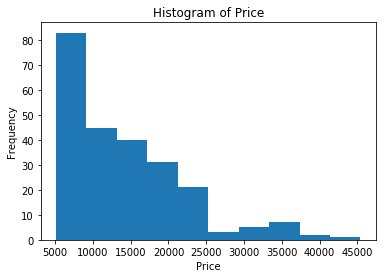

In [116]:
%matplotlib inline
# Graph for price
data['price'].plot(kind='hist', bins=10)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.savefig('price.png', bbox_inches = 'tight')
plt.show()
plt.close()

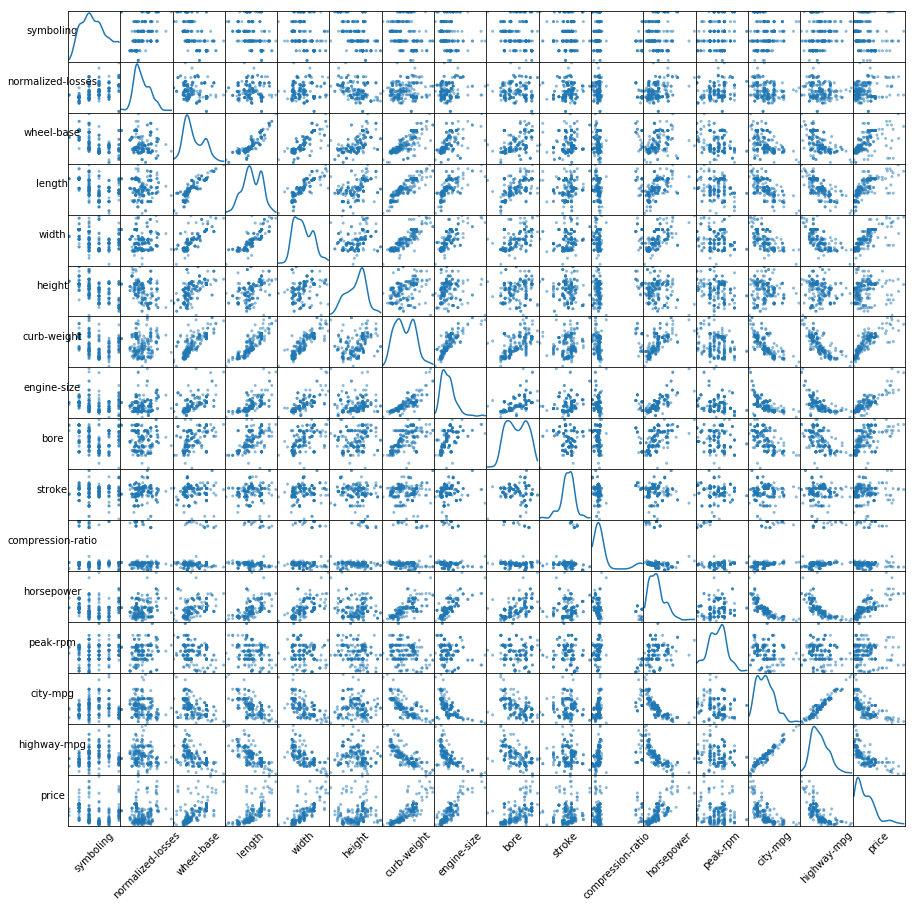

In [135]:
%matplotlib inline
from pandas.plotting import scatter_matrix
# Wheel-base scatter matrix
sm = scatter_matrix(data._get_numeric_data(), figsize=(15,15), diagonal="kde")
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.savefig('scatter.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [114]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line




In [115]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line